Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
data=pd.read_csv('uber.csv.xls')
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [4]:
df=data.copy()

In [5]:
df.drop(['Unnamed: 0','key'],axis=1,inplace=True)

In [6]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [8]:
df=df[(df.pickup_latitude>-90) & (df.pickup_latitude<90) &
      (df.dropoff_latitude>-90) & (df.dropoff_latitude<90) &
      (df.pickup_longitude>-180) & (df.pickup_longitude<180) & 
      (df.dropoff_longitude>-180) & (df.dropoff_longitude<180)
     ]

In [9]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000
mean,11.359849,-72.501786,39.917937,-72.511608,39.922031,1.684544
std,9.901868,10.449955,6.130412,10.412192,6.117669,1.385999
min,-52.000000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000
25%,6.000000,-73.992064,40.734793,-73.991407,40.733823,1.000000
50%,8.500000,-73.981822,40.752592,-73.980092,40.753042,1.000000
75%,12.500000,-73.967154,40.767157,-73.963658,40.768000,2.000000
max,499.000000,40.808425,48.018760,40.831932,45.031598,208.000000


In [10]:
#Calculating Distance using Haversine Formula for distance calculationg using latitudes and longitudes
import haversine as hs
df['Distance']=[hs.haversine((df['pickup_latitude'][i],df['pickup_longitude'][i]),(df['dropoff_latitude'][i],df['dropoff_longitude'][i])) for i in df.index]

C:\Users\mr09p\AppData\Local\Temp\ipykernel_13936\1127433479.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<AxesSubplot: >

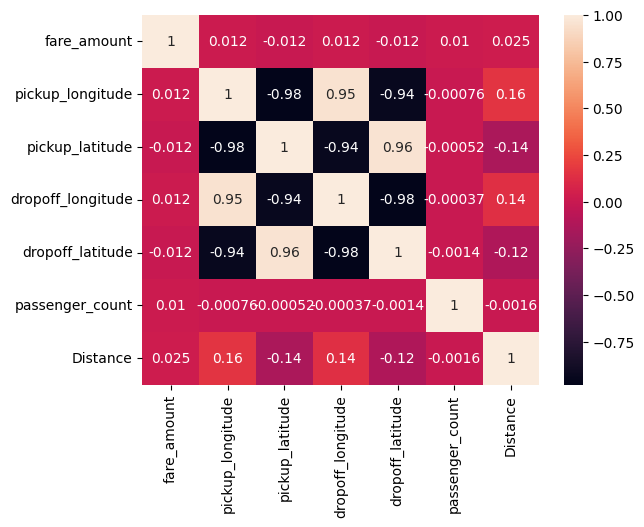

In [11]:
df.head()

Text(0, 0.5, 'Fare Amount in $')

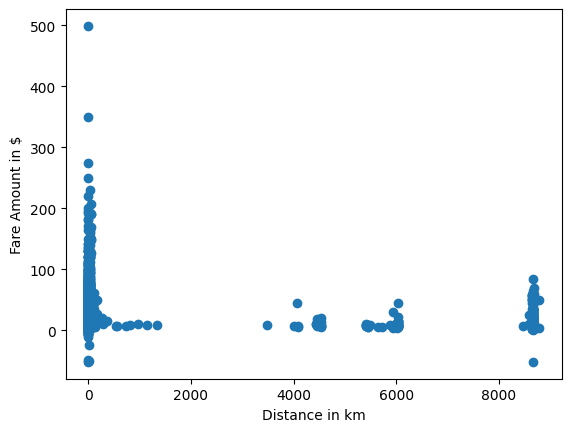

In [12]:
#Scatterplot of fare amount vs Distance
plt.scatter(df['Distance'],df['fare_amount'])
plt.xlabel('Distance in km')
plt.ylabel('Fare Amount in $')

In [13]:
#Outliers
df=df[(df.Distance>0) & (df.Distance<60)]
df=df[(df.fare_amount)>0]
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683325
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457593
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036384
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661686
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475456


In [14]:
df.drop(df[(df['fare_amount']>100) & (df['Distance']<1)].index, inplace = True )
df.drop(df[(df['fare_amount']<100) & (df['Distance']>100)].index, inplace = True )

Text(0, 0.5, 'Fare Amount in $')

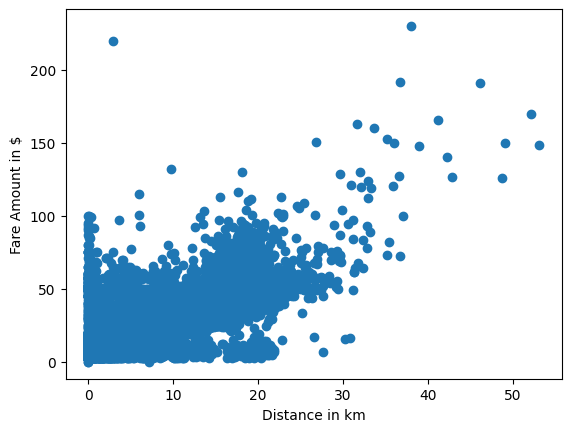

In [15]:
#Scatterplot of fare amount vs Distance
plt.scatter(df['Distance'],df['fare_amount'])
plt.xlabel('Distance in km')
plt.ylabel('Fare Amount in $')

C:\Users\mr09p\AppData\Local\Temp\ipykernel_13936\2323579710.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<AxesSubplot: >

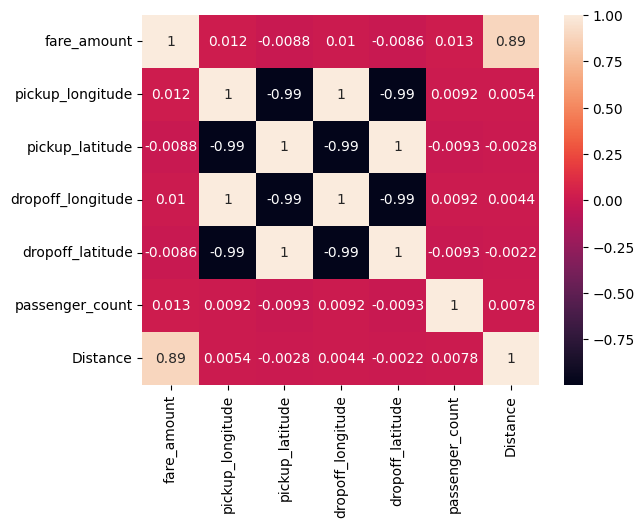

In [17]:
#Correlation
corr=df.corr()
sns.heatmap(corr,annot=True)

In [18]:
#Positive Correlation between fare_amount and Distance
X=df['Distance'].values.reshape(-1,1)
Y=df['fare_amount'].values.reshape(-1,1)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
std=StandardScaler()

In [21]:
x_std=std.fit_transform(X)
y_std=std.fit_transform(Y)

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x_std,y_std,test_size=0.3,random_state=0)

In [23]:
l_reg=LinearRegression()

In [24]:
l_reg.fit(x_train,y_train)

LinearRegression()

In [25]:
l_reg.score(x_train,y_train)

0.78372478285748

In [26]:
l_reg.score(x_test,y_test)

0.7828890107880871

In [27]:
preds=l_reg.predict(y_test)

In [28]:
#Mean Absolute Error
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,preds))

Mean Absolute Error:  0.07162461783765943


In [29]:
#Mean Absolute Error
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,preds))

Mean Squared Error:  0.013111282139888623


In [31]:
#RMSE
print("Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,preds)))

Mean Squared Error:  0.11450450707237957


In [32]:
#Random Forest Regressor
r_reg=RandomForestRegressor(n_estimators=50,random_state=0)
r_reg.fit(x_train,y_train)
preds2=r_reg.predict(y_test)
#Mean Absolute Error
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,preds2))
#Mean Absolute Error
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,preds2))
#RMSE
print("Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,preds2)))

C:\Users\mr09p\AppData\Local\Temp\ipykernel_13936\1523187150.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_reg.fit(x_train,y_train)


Mean Absolute Error:  0.15342036820658225
Mean Squared Error:  0.08098655319754705
Mean Squared Error:  0.28458136481074625
